# ELM368 Dersi - Lab4 Çalışması
## Grup C11

#### Kütüphaneler vb.

In [21]:
import numpy as np                      
#mat. fonksiyonlarını kullanabilmek için gereken kütüphane.
import cmath as c                       
#complex sayılar için başka bir mat. kütüphanesi.
from matplotlib import pyplot as plt    
#plot (grafik çizdirme) fonksiyonlarını kullanmakak için gereken kütüphane.
from scipy import signal
#spicy kütüphanesini ekliyoruz
%matplotlib notebook
#düzgün grafik görüntülemek için gerekiyor.
from scipy.io.wavfile import read # Ses dosyasının okunması için gerekli kütüphane
from IPython.lib.display import Audio # Ses dosyasının dinlenmesi için gerekli kütüphane

from numpy import pi as pi 
from numpy import sin as sin 
from numpy import cos as cos

import scipy.signal as sgnl
from scipy.fftpack import fft, ifft

import zplane
#pi sayısı, sin ve cos'u direkt pi, sin, cos olarak kullanmak için.

import warnings
warnings.simplefilter("ignore", np.ComplexWarning) 
#complex sayı hatalarını almamak için. ***
#*** bu işlem sonuçları etkilememektedir.

# Soru-1)

### a)

<IPython.core.display.Javascript object>


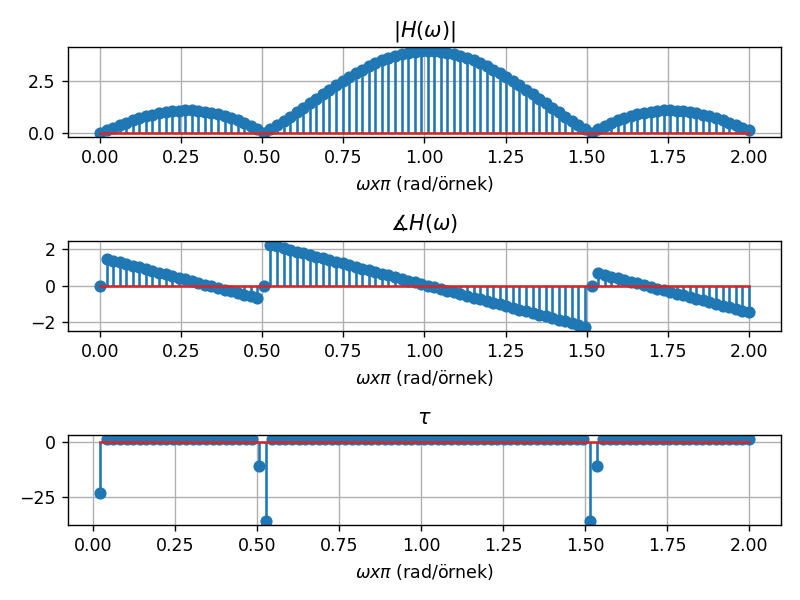

In [19]:
N = 100
n = np.arange(0,N,1)
w = np.linspace(0,2*pi,N)

h_n = np.array([1,-1,1,-1])

H_w = fft(h_n, N)

H_w_abs = np.abs(H_w)
H_w_pha = np.unwrap(np.angle(H_w))
tau_w   = -np.diff(H_w_pha)*(N/(2*pi))

plt.figure(1)

plt.subplot(3,1,1)
plt.title("$|H(\omega)|$")
plt.xlabel("$\omega x\pi$ (rad/örnek)")
plt.stem(w/pi,H_w_abs)
plt.grid()

plt.subplot(3,1,2)
plt.title("$\measuredangle H(\omega)$")
plt.xlabel("$\omega x\pi$ (rad/örnek)")
plt.stem(w/pi,H_w_pha)
plt.grid()

plt.subplot(3,1,3)
plt.title("$\\tau$")
plt.xlabel("$\omega x\pi$ (rad/örnek)")
plt.stem(w[1::]/pi,tau_w)
plt.grid()

plt.show()
plt.tight_layout()


YORUM: 
    Filtre yüksek geçiren filtre karakteristiğine sahiptir. Lineer faza ve sabit grup gecikmesine sahiptir. Kesim frekansı pi/2'dir. Filtre düşük frekansları bastırırken yüksek frekansları geçirir.

### b)

<IPython.core.display.Javascript object>


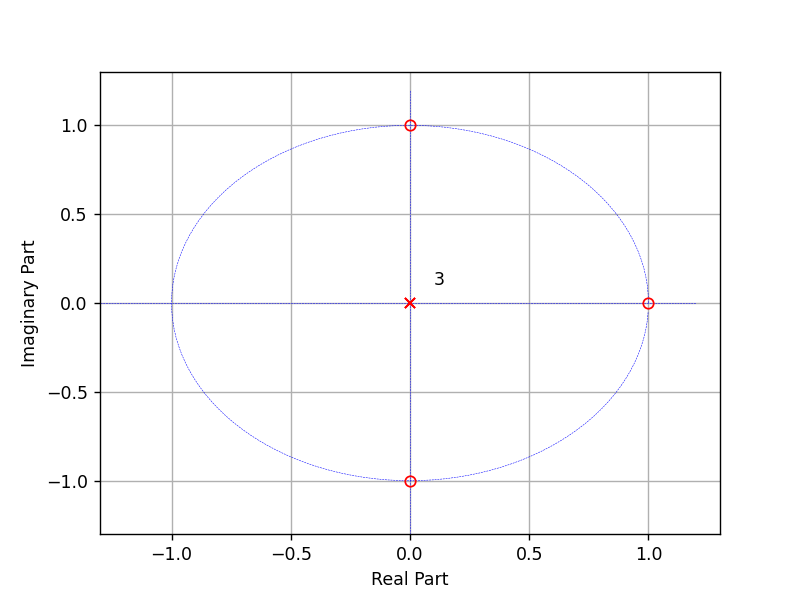

In [20]:
zplane.zplane(h_n,1)

YORUM:
   Kutup sıfır diagramına göre z=1'de sıfır var, bundan dolayı 0 frekans değeri civarı düşük frekansları söndürür, pi frekans  (yüksek frekansları) değerindeki sinyalleri geçirir. Bu yüzden yüksek geçiren filtre ve bant geçiren filtre olarak kullanılabilir.
   
Giriş işaretimiz $  x[n] = 5 + 4*dirac[n] + 2*cos(0.5*pi*n + pi/4) + 3*sin(pi/3*n - pi/6) $ verilmiştir. Buna göre çıkışta;
kutup-sıfır diyagramında "5" bileşeni z=1'e denk geldiği için sönümlenir ve çıkışta görülmez. 
Giriş işaretindeki sinüs ve cosinüs bileşenleri, pi/4 ve -pi/6 frekanslarında salınacaktır, kutup-sıfır diyagramına göre bu işaretlerin çıkışta genlik değişse bile, işaretler (karakteristik olarak) görülecektir.
Dirak bileşeni ise 0 frekansında görüneceğinden, "4*dirac[n]" bileşeni de sönümlenir.


### c)

<IPython.core.display.Javascript object>


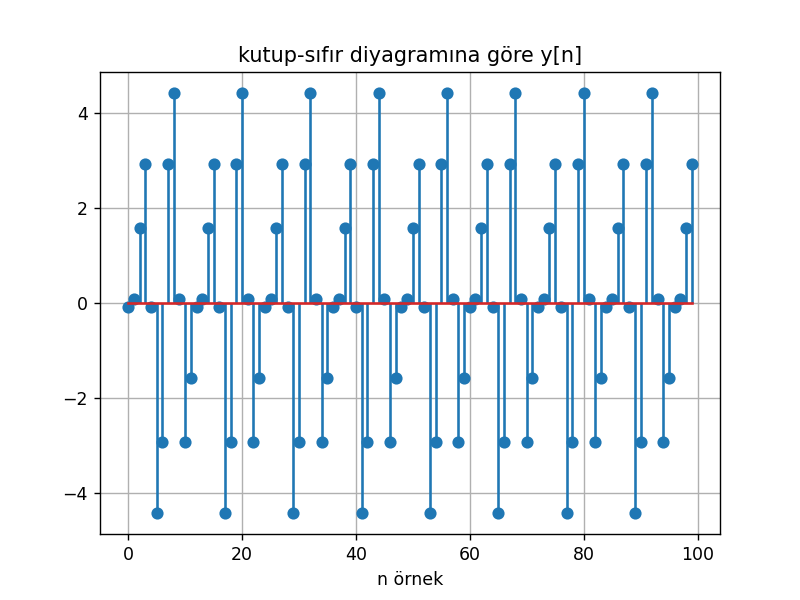

In [23]:
n = np.arange(0,100,1)
y_n = 2*cos(0.5*pi*n + pi/4) + 3*sin(pi*n/3 - pi/6)

plt.figure(3)

plt.title("kutup-sıfır diyagramına göre y[n]")
plt.xlabel("n örnek")
plt.stem(n,y_n)
plt.grid()
plt.show()


### d)

<IPython.core.display.Javascript object>


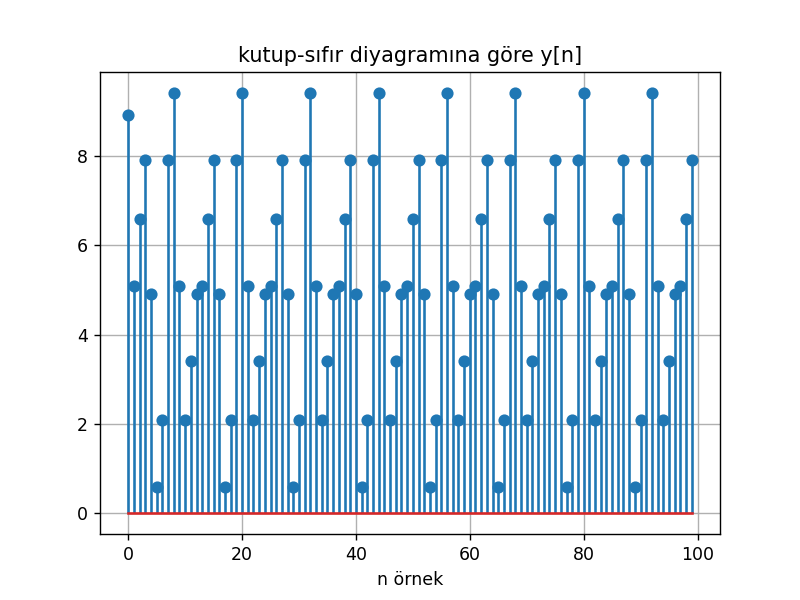

In [34]:
for i in range(len(n)):
    if i == 0:
        x_n[i] = 5 + 4 + 2*cos(0.5*pi*n[i] + pi/4) + 3*sin(pi*n[i]/3 - pi/6)
    else:
        x_n[i] = 5 + 0 + 2*cos(0.5*pi*n[i] + pi/4) + 3*sin(pi*n[i]/3 - pi/6)

plt.figure(4)

plt.title("x[n]")
plt.xlabel("n örnek")
plt.stem(n,x_n)
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


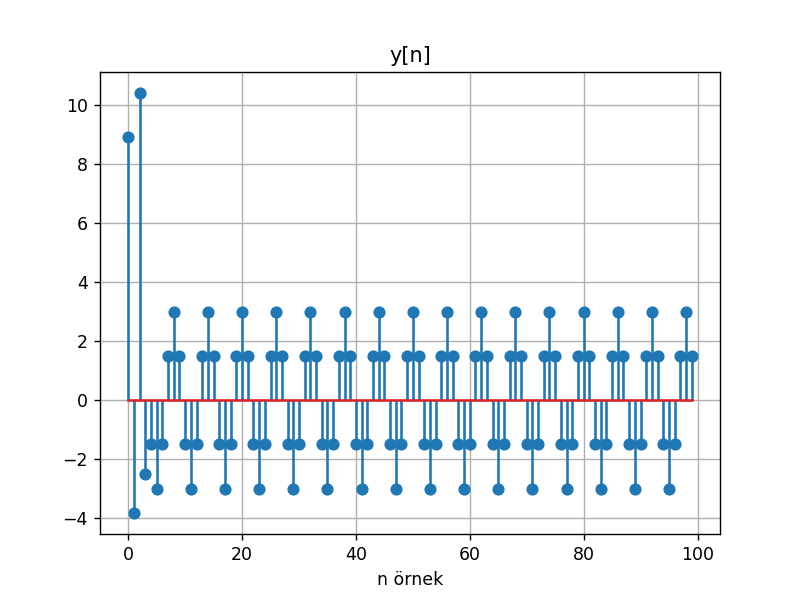

In [40]:
a = 1
b = [1,-1,1,-1]

y_n_2 = sgnl.lfilter(b,a,x_n)

plt.figure(5)

plt.title("y[n]")
plt.xlabel("n örnek")
plt.stem(n,y_n_2)
plt.grid()
plt.show()

